In [1]:
#S09 T02: Aprenentatge Supervisat - Regressions

In [2]:
#Nivell 1

In [3]:
#Exercici 1
#Crea almenys tres models de regressió diferents per intentar predir el millor possible 
#l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

In [4]:
#1.Model de regressió: Decision Tree Regression

In [1]:
#Llibreries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [7]:
#Dataset
df_dades=pd.read_csv('DelayedFlights.csv', engine="python", error_bad_lines=False, warn_bad_lines=False, sep=',')

In [8]:
# Netegem el dataset d'atributs innecesaris.
df_dades.drop(['Year','Month','DayofMonth','DayOfWeek','TailNum','Cancelled', 'CancellationCode', 'Diverted', 'UniqueCarrier', 'Origin', 'Dest'], axis=1, inplace=True) 

In [8]:
# Suprimim valors no numerics.
df_dades=df_dades.dropna() 

In [9]:
df_dades.corr().round(3)

,Unnamed: 0,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Unnamed: 0,1.000,-0.011,-0.015,-0.004,-0.001,-0.018,0.027,0.029,0.020,0.015,0.016,0.026,0.036,0.022,0.004,0.006,0.018,-0.004,0.001
DepTime,-0.011,1.000,0.840,0.373,0.714,-0.032,-0.057,-0.041,-0.059,0.094,0.116,-0.055,-0.025,0.002,-0.052,0.005,0.023,-0.015,0.169
CRSDepTime,-0.015,0.840,1.000,0.288,0.726,-0.067,-0.040,-0.022,-0.037,0.017,0.040,-0.025,-0.043,-0.007,-0.107,-0.009,-0.033,-0.017,0.168
ArrTime,-0.004,0.373,0.288,1.000,0.481,-0.004,-0.028,-0.029,-0.032,-0.079,-0.080,-0.044,0.043,-0.008,-0.084,-0.030,0.032,-0.007,-0.038
CRSArrTime,-0.001,0.714,0.726,0.481,1.000,-0.072,0.034,0.048,0.030,0.025,0.040,0.032,0.004,0.026,-0.096,-0.005,0.009,-0.013,0.131
FlightNum,-0.018,-0.032,-0.067,-0.004,-0.072,1.000,-0.327,-0.342,-0.347,0.036,0.034,-0.363,-0.006,0.002,0.056,0.067,0.015,-0.003,-0.053
ActualElapsedTime,0.027,-0.057,-0.040,-0.028,0.034,-0.327,1.000,0.965,0.969,0.084,-0.002,0.944,0.162,0.315,0.010,0.004,0.177,0.006,-0.034
CRSElapsedTime,0.029,-0.041,-0.022,-0.029,0.048,-0.342,0.965,1.000,0.984,0.032,0.028,0.981,0.090,0.127,0.027,-0.016,0.047,0.006,-0.012
AirTime,0.020,-0.059,-0.037,-0.032,0.030,-0.347,0.969,0.984,1.000,0.028,0.000,0.978,0.074,0.086,0.020,-0.018,0.063,0.007,-0.022
ArrDelay,0.015,0.094,0.017,-0.079,0.025,0.036,0.084,0.032,0.028,1.000,0.950,0.015,0.116,0.208,0.502,0.265,0.388,-0.002,0.478


In [10]:
df_dades['ArrDelay'].values

array([34., 57., 80., ..., 25., 75., 99.])

Text(0, 0.5, 'ArrDelay')

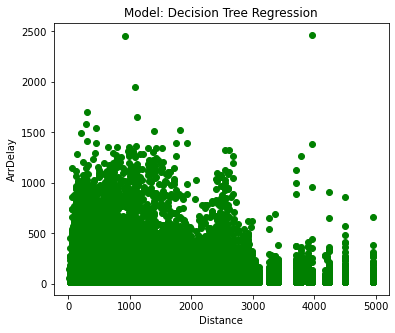

In [11]:
fig, axes = plt.subplots(1,1, figsize=(6,5))
plt.title("Model: Decision Tree Regression")
plt.scatter(x=df_dades['Distance'],y=df_dades['ArrDelay'], marker='o', color="green")
plt.xlabel('Distance')
plt.ylabel('ArrDelay')

In [12]:
X=df_dades #dataset
y=df_dades['ArrDelay'] #Atribut per realitzar la predicció

In [13]:
#Divisió del dataset en train i test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [14]:
X_train

,Unnamed: 0,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1146777,3829235,1802.0,1725,1935.0,1854,4019,153.0,149.0,132.0,41.0,37.0,839,8.0,13.0,0.0,0.0,41.0,0.0,0.0
959386,3221814,1340.0,1325,1701.0,1645,242,141.0,140.0,114.0,16.0,15.0,849,7.0,20.0,11.0,0.0,1.0,0.0,4.0
1093643,3638738,1139.0,1035,1243.0,1150,3863,64.0,75.0,49.0,53.0,64.0,337,5.0,10.0,0.0,49.0,0.0,0.0,4.0
195938,636803,2134.0,2100,2232.0,2205,178,58.0,65.0,42.0,27.0,34.0,236,7.0,9.0,2.0,0.0,0.0,0.0,25.0
999852,3352307,2221.0,2140,19.0,2358,45,298.0,318.0,283.0,21.0,41.0,2139,6.0,9.0,21.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598551,1873885,1532.0,1430,1630.0,1525,34,58.0,55.0,44.0,65.0,62.0,239,5.0,9.0,3.0,0.0,3.0,0.0,59.0
967927,3241516,2140.0,1721,2304.0,1828,855,144.0,127.0,83.0,276.0,259.0,590,48.0,13.0,0.0,0.0,17.0,0.0,259.0
1018428,3410529,1217.0,1035,1204.0,1030,4404,47.0,55.0,32.0,94.0,102.0,157,8.0,7.0,0.0,0.0,36.0,0.0,58.0
1646869,6030167,1659.0,1625,1805.0,1730,3672,126.0,125.0,95.0,35.0,34.0,588,19.0,12.0,4.0,0.0,1.0,0.0,30.0


In [15]:
X_test

,Unnamed: 0,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
127271,412778,1755.0,1735,1903.0,1845,4389,68.0,70.0,50.0,18.0,20.0,268,3.0,15.0,18.0,0.0,0.0,0.0,0.0
963314,3230730,1111.0,1025,1250.0,1204,501,99.0,99.0,75.0,46.0,46.0,447,4.0,20.0,36.0,0.0,0.0,0.0,10.0
596513,1864839,1040.0,1000,1147.0,1115,2437,67.0,75.0,54.0,32.0,40.0,337,3.0,10.0,0.0,0.0,0.0,0.0,32.0
1246796,4175974,113.0,2255,321.0,22,30,128.0,87.0,45.0,179.0,138.0,264,2.0,81.0,0.0,0.0,179.0,0.0,0.0
1904440,6925982,945.0,915,1239.0,1215,1490,114.0,120.0,96.0,24.0,30.0,641,5.0,13.0,8.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068858,3561794,1637.0,1610,1955.0,1921,1601,198.0,191.0,168.0,34.0,27.0,1065,3.0,27.0,0.0,0.0,34.0,0.0,0.0
215217,682107,2037.0,1955,2202.0,2120,1235,85.0,85.0,70.0,42.0,42.0,441,4.0,11.0,42.0,0.0,0.0,0.0,0.0
838260,2827199,707.0,700,1102.0,1038,774,175.0,158.0,130.0,24.0,7.0,1020,26.0,19.0,7.0,0.0,17.0,0.0,0.0
1136607,3787444,1628.0,1602,1858.0,1842,4138,90.0,100.0,74.0,16.0,26.0,507,4.0,12.0,0.0,16.0,0.0,0.0,0.0


In [16]:
y_train

1146777     41.0
959386      16.0
1093643     53.0
195938      27.0
999852      21.0
           ...  
598551      65.0
967927     276.0
1018428     94.0
1646869     35.0
710418      55.0
Name: ArrDelay, Length: 835816, dtype: float64

In [17]:
y_test

127271      18.0
963314      46.0
596513      32.0
1246796    179.0
1904440     24.0
           ...  
1068858     34.0
215217      42.0
838260      24.0
1136607     16.0
427894      16.0
Name: ArrDelay, Length: 411672, dtype: float64

In [18]:
#DecisionTreeRegressor. 
regressor = DecisionTreeRegressor(criterion='mse', random_state=42)
#Fit the regressor object to the dataset.
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [19]:
y_pred = regressor.predict(X_test)

In [20]:
print(y_pred)

[18. 46. 32. ... 24. 16. 16.]


In [21]:
print(y_test)

127271      18.0
963314      46.0
596513      32.0
1246796    179.0
1904440     24.0
           ...  
1068858     34.0
215217      42.0
838260      24.0
1136607     16.0
427894      16.0
Name: ArrDelay, Length: 411672, dtype: float64


In [22]:
mse=mean_squared_error(y_pred, y_test)
rmse=np.sqrt(mse)
print('Mean squared error: \n', rmse)

Mean squared error: 
 1.2275520849802337


In [23]:
r2=r2_score(y_pred, y_test)  #R2 Decision Tree Regression
print('Coefficient of Determination R2: \n', r2)

Coefficient of Determination R2: 
 0.999592396338025


In [24]:
# Valors de R2:
#  <0 --> model dolent.
# 0.0 --> model que prediu el valor mitjà.
# 1.0 --> model perfecte.

In [25]:
#2.Model de regressió: Random Forest

In [26]:
#Llibreries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
#Dataset
df_dades=pd.read_csv('DelayedFlights.csv', engine="python", error_bad_lines=False, warn_bad_lines=False, sep=',')

In [28]:
# Netegem el dataset d'atributs innecesaris.
df_dades.drop(['Year','Month','DayofMonth','DayOfWeek','TailNum','Cancelled', 'CancellationCode', 'Diverted', 'UniqueCarrier', 'Origin', 'Dest'], axis=1, inplace=True) 

In [29]:
# Suprimim valors no numerics.
df_dades=df_dades.dropna() 

In [30]:
df_dades.corr().round(3)

,Unnamed: 0,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Unnamed: 0,1.000,-0.011,-0.015,-0.004,-0.001,-0.018,0.027,0.029,0.020,0.015,0.016,0.026,0.036,0.022,0.004,0.006,0.018,-0.004,0.001
DepTime,-0.011,1.000,0.840,0.373,0.714,-0.032,-0.057,-0.041,-0.059,0.094,0.116,-0.055,-0.025,0.002,-0.052,0.005,0.023,-0.015,0.169
CRSDepTime,-0.015,0.840,1.000,0.288,0.726,-0.067,-0.040,-0.022,-0.037,0.017,0.040,-0.025,-0.043,-0.007,-0.107,-0.009,-0.033,-0.017,0.168
ArrTime,-0.004,0.373,0.288,1.000,0.481,-0.004,-0.028,-0.029,-0.032,-0.079,-0.080,-0.044,0.043,-0.008,-0.084,-0.030,0.032,-0.007,-0.038
CRSArrTime,-0.001,0.714,0.726,0.481,1.000,-0.072,0.034,0.048,0.030,0.025,0.040,0.032,0.004,0.026,-0.096,-0.005,0.009,-0.013,0.131
FlightNum,-0.018,-0.032,-0.067,-0.004,-0.072,1.000,-0.327,-0.342,-0.347,0.036,0.034,-0.363,-0.006,0.002,0.056,0.067,0.015,-0.003,-0.053
ActualElapsedTime,0.027,-0.057,-0.040,-0.028,0.034,-0.327,1.000,0.965,0.969,0.084,-0.002,0.944,0.162,0.315,0.010,0.004,0.177,0.006,-0.034
CRSElapsedTime,0.029,-0.041,-0.022,-0.029,0.048,-0.342,0.965,1.000,0.984,0.032,0.028,0.981,0.090,0.127,0.027,-0.016,0.047,0.006,-0.012
AirTime,0.020,-0.059,-0.037,-0.032,0.030,-0.347,0.969,0.984,1.000,0.028,0.000,0.978,0.074,0.086,0.020,-0.018,0.063,0.007,-0.022
ArrDelay,0.015,0.094,0.017,-0.079,0.025,0.036,0.084,0.032,0.028,1.000,0.950,0.015,0.116,0.208,0.502,0.265,0.388,-0.002,0.478


In [31]:
df_dades['ArrDelay'].values

array([34., 57., 80., ..., 25., 75., 99.])

In [32]:
X=df_dades #dataset
y=df_dades['ArrDelay'] #Atribut per realitzar la predicció

In [33]:
#Divisió del dataset en train i test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [34]:
X_train

,Unnamed: 0,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
364799,1145384,1807.0,1755,2020.0,1950,825,133.0,115.0,89.0,30.0,12.0,404,9.0,35.0,0.0,0.0,30.0,0.0,0.0
1038467,3479001,1201.0,1145,1531.0,1455,378,150.0,130.0,112.0,36.0,16.0,733,8.0,30.0,16.0,0.0,20.0,0.0,0.0
560096,1751287,1426.0,1405,1728.0,1652,547,182.0,167.0,148.0,36.0,21.0,925,11.0,23.0,10.0,0.0,15.0,0.0,11.0
213119,676540,1734.0,1650,1922.0,1850,2443,108.0,120.0,92.0,32.0,44.0,671,7.0,9.0,0.0,0.0,0.0,0.0,32.0
97441,308632,17.0,2358,653.0,635,700,216.0,217.0,190.0,18.0,19.0,1678,8.0,18.0,0.0,0.0,0.0,0.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166340,539385,2206.0,2143,113.0,26,89,247.0,223.0,218.0,47.0,23.0,1449,9.0,20.0,23.0,0.0,24.0,0.0,0.0
389778,1219042,2348.0,2135,229.0,20,3663,101.0,105.0,82.0,129.0,133.0,629,6.0,13.0,58.0,0.0,0.0,0.0,71.0
202316,651574,1810.0,1740,1916.0,1845,928,66.0,65.0,52.0,31.0,30.0,291,3.0,11.0,4.0,0.0,1.0,0.0,26.0
1029143,3443072,940.0,902,1057.0,1003,1223,197.0,181.0,157.0,54.0,38.0,1123,8.0,32.0,38.0,0.0,16.0,0.0,0.0


In [35]:
X_test

,Unnamed: 0,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1781657,6580677,1054.0,1027,1353.0,1256,7322,119.0,89.0,66.0,57.0,27.0,473,2.0,51.0,0.0,0.0,30.0,0.0,27.0
419578,1293654,2113.0,2105,4.0,2348,2624,171.0,163.0,141.0,16.0,8.0,1034,6.0,24.0,8.0,0.0,8.0,0.0,0.0
78226,247515,1757.0,1532,2026.0,1809,1175,149.0,157.0,117.0,137.0,145.0,954,15.0,17.0,73.0,0.0,0.0,0.0,64.0
1300393,4354707,2155.0,1925,2.0,2117,2912,127.0,112.0,86.0,165.0,150.0,554,3.0,38.0,0.0,0.0,15.0,0.0,150.0
235411,749612,1040.0,856,1315.0,1155,5031,155.0,179.0,136.0,80.0,104.0,901,8.0,11.0,80.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598076,1871626,2050.0,2030,2210.0,2155,593,80.0,85.0,68.0,15.0,20.0,407,4.0,8.0,4.0,0.0,0.0,0.0,11.0
409296,1265061,1601.0,1545,1738.0,1710,440,97.0,85.0,66.0,28.0,16.0,408,8.0,23.0,7.0,0.0,12.0,0.0,9.0
1120814,3734140,1554.0,1525,1722.0,1642,2505,88.0,77.0,58.0,40.0,29.0,362,5.0,25.0,0.0,0.0,40.0,0.0,0.0
1791543,6612205,1425.0,1350,1700.0,1627,6689,155.0,157.0,122.0,33.0,35.0,722,10.0,23.0,0.0,33.0,0.0,0.0,0.0


In [36]:
y_train

364799      30.0
1038467     36.0
560096      36.0
213119      32.0
97441       18.0
           ...  
166340      47.0
389778     129.0
202316      31.0
1029143     54.0
185156      41.0
Name: ArrDelay, Length: 935616, dtype: float64

In [37]:
y_test

1781657     57.0
419578      16.0
78226      137.0
1300393    165.0
235411      80.0
           ...  
598076      15.0
409296      28.0
1120814     40.0
1791543     33.0
233452      50.0
Name: ArrDelay, Length: 311872, dtype: float64

In [38]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
#Entrenament del model Random Forest
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
y_pred = rf.predict(X_test)
# Calcul d'errors absoluts
errors = abs(y_pred - y_test)
# Visualitzar mitjana d'errors absoluts
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.0


In [43]:
mse=mean_squared_error(y_pred, y_test)
rmse=np.sqrt(mse)
print('Mean squared error: \n', rmse)

Mean squared error: 
 1.2103739663120567


In [44]:
r2=r2_score(y_pred, y_test)  #R2 Decision Tree Regression
print('Coefficient of Determination R2: \n', r2)

Coefficient of Determination R2: 
 0.9996068231920794


In [ ]:
# Valors de R2:
#  <0 --> model dolent.
# 0.0 --> model que prediu el valor mitjà.
# 1.0 --> model perfecte.

In [1]:
#3.Model de regressió: Simple Linear Regression

In [28]:
#Llibreries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [34]:
#Dataset
df_dades=pd.read_csv('DelayedFlights.csv', engine="python", error_bad_lines=False, warn_bad_lines=False, sep=',')

In [35]:
# Netegem el dataset d'atributs innecesaris.
df_dades.drop(['Year','Month','DayofMonth','DayOfWeek','TailNum','Cancelled', 'CancellationCode', 'Diverted', 'UniqueCarrier', 'Origin', 'Dest'], axis=1, inplace=True) 

In [36]:
df_dades=df_dades.dropna() # Suprimim valors no numerics.

In [37]:
df_dades.corr().round(3)

,Unnamed: 0,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Unnamed: 0,1.000,-0.011,-0.015,-0.004,-0.001,-0.018,0.027,0.029,0.020,0.015,0.016,0.026,0.036,0.022,0.004,0.006,0.018,-0.004,0.001
DepTime,-0.011,1.000,0.840,0.373,0.714,-0.032,-0.057,-0.041,-0.059,0.094,0.116,-0.055,-0.025,0.002,-0.052,0.005,0.023,-0.015,0.169
CRSDepTime,-0.015,0.840,1.000,0.288,0.726,-0.067,-0.040,-0.022,-0.037,0.017,0.040,-0.025,-0.043,-0.007,-0.107,-0.009,-0.033,-0.017,0.168
ArrTime,-0.004,0.373,0.288,1.000,0.481,-0.004,-0.028,-0.029,-0.032,-0.079,-0.080,-0.044,0.043,-0.008,-0.084,-0.030,0.032,-0.007,-0.038
CRSArrTime,-0.001,0.714,0.726,0.481,1.000,-0.072,0.034,0.048,0.030,0.025,0.040,0.032,0.004,0.026,-0.096,-0.005,0.009,-0.013,0.131
FlightNum,-0.018,-0.032,-0.067,-0.004,-0.072,1.000,-0.327,-0.342,-0.347,0.036,0.034,-0.363,-0.006,0.002,0.056,0.067,0.015,-0.003,-0.053
ActualElapsedTime,0.027,-0.057,-0.040,-0.028,0.034,-0.327,1.000,0.965,0.969,0.084,-0.002,0.944,0.162,0.315,0.010,0.004,0.177,0.006,-0.034
CRSElapsedTime,0.029,-0.041,-0.022,-0.029,0.048,-0.342,0.965,1.000,0.984,0.032,0.028,0.981,0.090,0.127,0.027,-0.016,0.047,0.006,-0.012
AirTime,0.020,-0.059,-0.037,-0.032,0.030,-0.347,0.969,0.984,1.000,0.028,0.000,0.978,0.074,0.086,0.020,-0.018,0.063,0.007,-0.022
ArrDelay,0.015,0.094,0.017,-0.079,0.025,0.036,0.084,0.032,0.028,1.000,0.950,0.015,0.116,0.208,0.502,0.265,0.388,-0.002,0.478


In [38]:
df_dades['ArrDelay'].values

array([34., 57., 80., ..., 25., 75., 99.])

In [39]:
X=df_dades
y=df_dades['ArrDelay'] #atribut per realitzar la predicció

In [40]:
fig=plt.figure(figsize=(20,20))
reg=LinearRegression().fit(X, y, sample_weight=None)
reg.score(X, y)

1.0

<Figure size 1440x1440 with 0 Axes>

In [41]:
print('Coefs: \n', reg.coef_)

Coefs: 
 [-1.10436911e-20  5.39619638e-17  2.21194813e-16  1.70365519e-17
 -8.22151488e-17  3.24282485e-17 -1.50241720e-13  3.16525551e-13
 -1.65992193e-13  8.33333333e-01 -3.17429030e-13  1.26683939e-16
 -1.64146543e-13 -1.64980631e-13  1.66666667e-01  1.66666667e-01
  1.66666667e-01  1.66666667e-01  1.66666667e-01]


In [42]:
print('Intercept: \n', reg.intercept_)

Intercept: 
 -4.050093593832571e-13


In [43]:
print('Predict: \n', reg.predict(X))

Predict: 
 [34. 57. 80. ... 25. 75. 99.]


In [44]:
mean_squared_error(y, reg.predict(X)) #MSE Simple Linear Regression

2.5620427074833863e-26

In [45]:
r2_score(y, reg.predict(X)) #R2 Simple Linear Regression

1.0

In [18]:
# Valors de R2:
#  <0 --> model dolent.
# 0.0 --> model que prediu el valor mitjà.
# 1.0 --> model perfecte.

In [ ]:
#4.Model de regressió: Multiple Linear Regression

In [46]:
#Llibreries
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [47]:
#Dataset
df_dades=pd.read_csv('DelayedFlights.csv', engine="python", error_bad_lines=False, warn_bad_lines=False, sep=',')

In [48]:
# Netegem el dataset d'atributs innecesaris.
df_dades.drop(['Year','Month','DayofMonth','DayOfWeek','TailNum','Cancelled', 'CancellationCode', 'Diverted', 'UniqueCarrier', 'Origin', 'Dest'], axis=1, inplace=True) 

In [49]:
df_dades=df_dades.dropna() # Suprimim valors no numerics.

In [50]:
df_dades.corr().round(3)

,Unnamed: 0,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Unnamed: 0,1.000,-0.011,-0.015,-0.004,-0.001,-0.018,0.027,0.029,0.020,0.015,0.016,0.026,0.036,0.022,0.004,0.006,0.018,-0.004,0.001
DepTime,-0.011,1.000,0.840,0.373,0.714,-0.032,-0.057,-0.041,-0.059,0.094,0.116,-0.055,-0.025,0.002,-0.052,0.005,0.023,-0.015,0.169
CRSDepTime,-0.015,0.840,1.000,0.288,0.726,-0.067,-0.040,-0.022,-0.037,0.017,0.040,-0.025,-0.043,-0.007,-0.107,-0.009,-0.033,-0.017,0.168
ArrTime,-0.004,0.373,0.288,1.000,0.481,-0.004,-0.028,-0.029,-0.032,-0.079,-0.080,-0.044,0.043,-0.008,-0.084,-0.030,0.032,-0.007,-0.038
CRSArrTime,-0.001,0.714,0.726,0.481,1.000,-0.072,0.034,0.048,0.030,0.025,0.040,0.032,0.004,0.026,-0.096,-0.005,0.009,-0.013,0.131
FlightNum,-0.018,-0.032,-0.067,-0.004,-0.072,1.000,-0.327,-0.342,-0.347,0.036,0.034,-0.363,-0.006,0.002,0.056,0.067,0.015,-0.003,-0.053
ActualElapsedTime,0.027,-0.057,-0.040,-0.028,0.034,-0.327,1.000,0.965,0.969,0.084,-0.002,0.944,0.162,0.315,0.010,0.004,0.177,0.006,-0.034
CRSElapsedTime,0.029,-0.041,-0.022,-0.029,0.048,-0.342,0.965,1.000,0.984,0.032,0.028,0.981,0.090,0.127,0.027,-0.016,0.047,0.006,-0.012
AirTime,0.020,-0.059,-0.037,-0.032,0.030,-0.347,0.969,0.984,1.000,0.028,0.000,0.978,0.074,0.086,0.020,-0.018,0.063,0.007,-0.022
ArrDelay,0.015,0.094,0.017,-0.079,0.025,0.036,0.084,0.032,0.028,1.000,0.950,0.015,0.116,0.208,0.502,0.265,0.388,-0.002,0.478


In [51]:
df_dades['ArrDelay'].values

array([34., 57., 80., ..., 25., 75., 99.])

In [52]:
X=df_dades[['Distance', 'WeatherDelay']]
y=df_dades['ArrDelay']

In [53]:
regr=linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [54]:
print('Coefs: \n', regr.coef_)

Coefs: 
 [0.00231041 0.74944513]


In [55]:
print('Intercept: \n', regr.intercept_)

Intercept: 
 58.80221489915952


In [56]:
print('Predict: \n', regr.predict(X))

Predict: 
 [ 59.99207759  62.47808196  60.71523685 ...  60.89544906 102.63189571
  60.39408944]


In [57]:
mean_squared_error(y, regr.predict(X)) #MSE Multiple Linear Regression

3430.919318056041

In [58]:
r2_score(y, regr.predict(X)) #R2 Multiple Linear Regression

0.07047788136977684

In [59]:
# Valors de R2:
#  <0 --> model dolent.
# 0.0 --> model que prediu el valor mitjà.
# 1.0 --> model perfecte.

In [60]:
#5.Model de regressió: Polynomial Regression

In [61]:
#Llibreries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [62]:
#Dataset
df_dades=pd.read_csv('DelayedFlights.csv', engine="python", error_bad_lines=False, warn_bad_lines=False, sep=',')

In [63]:
# Netegem el dataset d'atributs innecesaris.
df_dades.drop(['Year','Month','DayofMonth','DayOfWeek','TailNum','Cancelled', 'CancellationCode', 'Diverted', 'UniqueCarrier', 'Origin', 'Dest'], axis=1, inplace=True) 

In [64]:
df_dades=df_dades.dropna() # Suprimim valors no numerics.

In [65]:
df_dades.corr().round(3)

,Unnamed: 0,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Unnamed: 0,1.000,-0.011,-0.015,-0.004,-0.001,-0.018,0.027,0.029,0.020,0.015,0.016,0.026,0.036,0.022,0.004,0.006,0.018,-0.004,0.001
DepTime,-0.011,1.000,0.840,0.373,0.714,-0.032,-0.057,-0.041,-0.059,0.094,0.116,-0.055,-0.025,0.002,-0.052,0.005,0.023,-0.015,0.169
CRSDepTime,-0.015,0.840,1.000,0.288,0.726,-0.067,-0.040,-0.022,-0.037,0.017,0.040,-0.025,-0.043,-0.007,-0.107,-0.009,-0.033,-0.017,0.168
ArrTime,-0.004,0.373,0.288,1.000,0.481,-0.004,-0.028,-0.029,-0.032,-0.079,-0.080,-0.044,0.043,-0.008,-0.084,-0.030,0.032,-0.007,-0.038
CRSArrTime,-0.001,0.714,0.726,0.481,1.000,-0.072,0.034,0.048,0.030,0.025,0.040,0.032,0.004,0.026,-0.096,-0.005,0.009,-0.013,0.131
FlightNum,-0.018,-0.032,-0.067,-0.004,-0.072,1.000,-0.327,-0.342,-0.347,0.036,0.034,-0.363,-0.006,0.002,0.056,0.067,0.015,-0.003,-0.053
ActualElapsedTime,0.027,-0.057,-0.040,-0.028,0.034,-0.327,1.000,0.965,0.969,0.084,-0.002,0.944,0.162,0.315,0.010,0.004,0.177,0.006,-0.034
CRSElapsedTime,0.029,-0.041,-0.022,-0.029,0.048,-0.342,0.965,1.000,0.984,0.032,0.028,0.981,0.090,0.127,0.027,-0.016,0.047,0.006,-0.012
AirTime,0.020,-0.059,-0.037,-0.032,0.030,-0.347,0.969,0.984,1.000,0.028,0.000,0.978,0.074,0.086,0.020,-0.018,0.063,0.007,-0.022
ArrDelay,0.015,0.094,0.017,-0.079,0.025,0.036,0.084,0.032,0.028,1.000,0.950,0.015,0.116,0.208,0.502,0.265,0.388,-0.002,0.478


In [66]:
df_dades['ArrDelay'].values

array([34., 57., 80., ..., 25., 75., 99.])

In [67]:
X=df_dades
y=df_dades['ArrDelay'] #atribut per realitzar la predicció

In [68]:
poly=PolynomialFeatures(degree=2, include_bias=False)
poly_features=poly.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [69]:
preg=LinearRegression()
preg.fit(X_train, y_train)

LinearRegression()

In [70]:
preg_y_predicted=preg.predict(X_test)
preg_rmse = np.sqrt(mean_squared_error(y_test, preg_y_predicted))
print('Predict: \n', preg_rmse) #MSE Polynomial Regression

Predict: 
 3.567343164108142e-05


In [32]:
print('R2 Score: \n', r2_score(y_test, preg_y_predicted)) #R2 Polynomial Regression

R2 Score: 
 0.9999999999996576


In [ ]:
# Valors de R2:
#  <0 --> model dolent.
# 0.0 --> model que prediu el valor mitjà.
# 1.0 --> model perfecte.

In [ ]:
#Exercici 2
#Compara’ls en base al MSE (Mean squared error) i al R2 (Coefficient of Determination).

In [ ]:
#Valors MSE (Mean squared error)

In [77]:
#Valors de MSE recollits de l'Exercici 1
print('Valors MSE')
print('Decision Tree Regression:', round(1.2275520849802337,3))
print('Random Forest:', round(1.2103739663120567,3))
print('Simple Linear Regression:', round(2.5620427074833863e-26,3))
print('Multiple Linear Regression:', round(3430.919318056041,3))
print('Polynomial Regression:', round(3.567343164108142e-05,3))

Valors MSE
Decision Tree Regression: 1.228
Random Forest: 1.21
Simple Linear Regression: 0.0
Multiple Linear Regression: 3430.919
Polynomial Regression: 0.0


In [ ]:
#Els models Simple Linear Regression i Polynomial Regression coincideixen en un valor 0.0. 
#D'altra banda, els models Decision Tree Regression i Random Forest tenen un valor molt semblant (Entre 1.21 i 1.23).
#El model restant Multiple Linear Regression dona un valor (probablement) erroni. Descartem aquest darrer valor.

In [ ]:
#Valors R2(Coefficient of Determination).

In [76]:
#Valors de R2 recollits de l'Exercici 1
print('Valors R2')
print('Decision Tree Regression:', round(0.999592396338025,3))
print('Random Forest:', round(0.9996068231920794,3))
print('Simple Linear Regression:', round(1.0,3))
print('Multiple Linear Regression:', round(0.07047788136977684,3))
print('Polynomial Regression:', round(0.9999999999996576,3))

Valors R2
Decision Tree Regression: 1.0
Random Forest: 1.0
Simple Linear Regression: 1.0
Multiple Linear Regression: 0.07
Polynomial Regression: 1.0


In [ ]:
#Hi ha coincidencia (R2) als models de regressió: Decision Tree Regression, Random Forest, 
#Simple Linear Regression i Polynomial Regression. Una vegada s'ha realitzat un arrodoniment 
#ens dona valor 1.0.
#El valor discordant ens el dona el model Multiple Linear Regression, molt proper a 0.

In [81]:
#Exercici 3
#Entrena’ls utilitzant els diferents paràmetres que admeten.

In [ ]:
#Model A: Simple Linear Regression

In [90]:
#Llibreries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [105]:
#Escollim els atributs AirTime i Distance
X=df_dades[['AirTime','Distance']]
y=df_dades['ArrDelay'] #atribut per realitzar la predicció

In [106]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=24)

In [107]:
train=LinearRegression().fit(X_train, y_train, sample_weight=None)
#Entrenament del model Simple Linear Regression
predict=train.predict(X_test)

In [110]:
MSE=mean_squared_error(y_test, predict)
print('Valor MSE -->', round(MSE,3))

Valor MSE --> 3629.934


In [111]:
r2=r2_score(y_test, predict)
print('Valor r2 -->', round(r2,3))

Valor r2 --> 0.004


In [126]:
train.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [119]:
#Model B: Random Forest

In [120]:
#Llibreries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [121]:
#Escollim els atributs AirTime i Distance
X=df_dades[['AirTime','Distance']]
y=df_dades['ArrDelay'] #atribut per realitzar la predicció

In [122]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=24)

In [123]:
train=RandomForestRegressor(n_estimators = 100, random_state = 42)
#Entrenament del model Random Forest
train.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [124]:
MSE=mean_squared_error(y_test, predict)
print('Valor MSE -->', round(MSE,3))

Valor MSE --> 3629.934


In [125]:
r2=r2_score(y_test, predict)
print('Valor r2 -->', round(r2,3))

Valor r2 --> 0.004


In [127]:
train.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Exercici 4
#Compara el seu rendiment utilitzant l’aproximació train/test o utilitzant totes les dades
#(validació interna)

In [ ]:
#Model C: Polynomial Regression

In [149]:
#Llibreries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [150]:
poly=PolynomialFeatures(degree=2, include_bias=False)
poly_features=poly.fit_transform(X)

In [151]:
#Escollim tots els atributs
X=df_dades
y=df_dades['ArrDelay'] #atribut per realitzar la predicció

In [152]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=24)

In [157]:
train=LinearRegression()
train.fit(X_train, y_train)

LinearRegression()

In [163]:
train_predicted=train.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_test, train_predicted))
print('Valor MSE Predict -->', round(train_rmse,3)) #MSE Polynomial Regression

Valor MSE Predict --> 0.0


In [169]:
print('Valor R2 Predict -->', r2_score(y_test, train_predicted)) #R2 Polynomial Regression

Valor R2 Predict --> 1.0


In [156]:
train.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Model D: Decision Tree Regression

In [171]:
#Llibreries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [172]:
#Escollim tots els atributs
X=df_dades
y=df_dades['ArrDelay'] #atribut per realitzar la predicció

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [174]:
reg_train=DecisionTreeRegressor(criterion='mse', random_state=42)
reg_train.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [175]:
y_pred = reg_train.predict(X_test)

In [176]:
mse=mean_squared_error(y_pred, y_test)
rmse=np.sqrt(mse)
print('Valor MSE Predict -->', round(rmse,3))

Valor MSE Predict --> 0.191


In [177]:
r2=r2_score(y_pred, y_test)  #R2 Decision Tree Regression
print('Valor R2 Predict -->', round(r2,3))

Valor R2 Predict --> 1.0


In [178]:
train.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [ ]:
#Una vegada aquests 2 models (Decision Tree Regression i Polynomial Regression) s'han executat, coincideixen en un mateix resultat del coeficient R2 (1.0).
#El valor Mean Squared Error difereix en ambdós models.

In [ ]:
#Nivell 2

In [ ]:
#Exercici 5
#Realitza algun procés d’enginyeria de variables per millorar-ne la predicció: 
#standarditzacio d'atributs i/o depuracio d'outliers.

In [76]:
df_dades.dtypes

Unnamed: 0             int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
FlightNum              int64
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
Distance               int64
TaxiIn               float64
TaxiOut              float64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [84]:
#Standardització d'atributs numerics de tipus int.
df_dades[['CRSDepTime','CRSArrTime','FlightNum','Distance']]

,CRSDepTime,CRSArrTime,FlightNum,Distance
3,1755,1925,3920,515
5,1830,1940,509,1591
7,1510,1725,1333,828
9,1425,1625,675,1489
11,1255,1510,4,838
...,...,...,...,...
1936751,830,1008,1616,545
1936752,1520,1718,1620,151
1936753,1220,1552,1621,906
1936754,600,749,1631,481


In [82]:
#StandardScaler per valors númerics del dataframe df_dades
from sklearn.preprocessing import StandardScaler
#Implementation
data = df_dades[['CRSDepTime','CRSArrTime','FlightNum','Distance']]
data = data.dropna() #Esborrem valors NaN
scaler = StandardScaler() #
scaler.fit(data) #
print('<-- Dataframe wcupmatch_df preprocessat --> \n', scaler.transform(data))

<-- Dataframe wcupmatch_df preprocessat --> 
 [[ 0.6340576   0.59025462  0.82274411 -0.40507853]
 [ 0.81212969  0.62274066 -0.88485     1.51853552]
 [ 0.05235546  0.15710741 -0.47234412  0.15448578]
 ...
 [-0.63618994 -0.21756492 -0.32816731  0.29392992]
 [-2.1082525  -1.95665096 -0.32316117 -0.46586188]
 [-1.52180177 -1.39139385 -0.32316117 -0.09401083]]


In [ ]:
scaled_data = scaler.transform(data)
print(scaled_data.mean(axis = 0))

In [ ]:
print('<-- Dataframe wcupmatch_df preprocessat --> \n', scaler.mean_)

In [88]:
#Standardització d'atributs numerics de tipus float.
df_dades[['DepTime','ArrTime','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','TaxiIn','TaxiOut','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]

,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,1829.0,1959.0,90.0,90.0,77.0,34.0,3.0,10.0,2.0,0.0,0.0,0.0,32.0
5,1937.0,2037.0,240.0,250.0,230.0,57.0,3.0,7.0,10.0,0.0,0.0,0.0,47.0
7,1644.0,1845.0,121.0,135.0,107.0,80.0,6.0,8.0,8.0,0.0,0.0,0.0,72.0
9,1452.0,1640.0,228.0,240.0,213.0,15.0,7.0,8.0,3.0,0.0,0.0,0.0,12.0
11,1323.0,1526.0,123.0,135.0,110.0,16.0,4.0,9.0,0.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936751,921.0,1112.0,111.0,98.0,82.0,64.0,8.0,21.0,51.0,0.0,13.0,0.0,0.0
1936752,1552.0,1735.0,43.0,58.0,27.0,17.0,9.0,7.0,0.0,0.0,0.0,0.0,17.0
1936753,1250.0,1617.0,147.0,152.0,120.0,25.0,9.0,18.0,3.0,0.0,0.0,0.0,22.0
1936754,657.0,904.0,127.0,109.0,78.0,75.0,15.0,34.0,0.0,57.0,18.0,0.0,0.0


In [107]:
#StandardScaler per valors float del dataframe df_dades
from sklearn.preprocessing import StandardScaler
#Implementation
data = df_dades[['DepTime','ArrTime','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','TaxiIn','TaxiOut','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]
data = data.dropna() #Esborrem valors NaN
scaler = StandardScaler() #
scaler.fit(data) #
print('<-- Dataframe wcupmatch_df preprocessat --> \n', scaler.transform(data))

<-- Dataframe wcupmatch_df preprocessat --> 
 [[ 5.94651689e-01  5.86104520e-01 -6.27665526e-01 ... -4.43993094e-01
  -4.45624906e-02  1.59399800e-01]
 [ 8.32364614e-01  7.19679633e-01  1.44713010e+00 ... -4.43993094e-01
  -4.45624906e-02  5.16076899e-01]
 [ 1.87458253e-01  3.90879354e-01 -1.98874430e-01 ... -4.43993094e-01
  -4.45624906e-02  1.11053873e+00]
 ...
 [-6.79753714e-01  4.29023148e-04  1.60756811e-01 ... -4.43993094e-01
  -4.45624906e-02 -7.83849329e-02]
 [-1.98497376e+00 -1.22058451e+00 -1.15882605e-01 ...  8.80312453e-02
  -4.45624906e-02 -6.01511345e-01]
 [-1.21460780e+00 -8.01021656e-01  3.68236373e-01 ...  1.17588153e-01
  -4.45624906e-02  1.27698804e+00]]


In [108]:
scaled_data = scaler.transform(data)
print(scaled_data.mean(axis = 0))

[ 1.67000508e-16 -5.94184619e-17  1.26856593e-16 -1.62443878e-16
  5.51807955e-17 -2.26008873e-17  1.85910525e-17 -1.19839383e-17
 -2.55399140e-17  1.76797264e-17 -5.22018983e-17 -4.46549790e-18
  5.17633226e-17]


In [109]:
print('<-- Dataframe wcupmatch_df preprocessat --> \n', scaler.mean_)

<-- Dataframe wcupmatch_df preprocessat --> 
 [1.55883218e+03 1.61674948e+03 1.35377881e+02 1.31764029e+02
 1.07420290e+02 6.32912084e+01 7.29723572e+00 2.06603550e+01
 1.91793989e+01 3.70357070e+00 1.50216355e+01 9.01371396e-02
 2.52964662e+01]


In [110]:
#Depuració d'outliers.

In [117]:
#L'atribut WeatherDelay té valors de 1300 o superiors. Interpretem que es tracta de valors outliers
print(data['WeatherDelay'].head(100)>=1300)

3      False
5      False
7      False
9      False
11     False
       ...  
150    False
153    False
154    False
155    False
156    False
Name: WeatherDelay, Length: 100, dtype: bool


In [120]:
#Esborrem les instàncies que hem indicat com a outliers
data.drop(data[data.WeatherDelay >= 1300].index, inplace=True)

In [121]:
data['WeatherDelay']

3           0.0
5           0.0
7           0.0
9           0.0
11          0.0
           ... 
1936751     0.0
1936752     0.0
1936753     0.0
1936754    57.0
1936755     0.0
Name: WeatherDelay, Length: 1247487, dtype: float64

In [122]:
data

,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,1829.0,1959.0,90.0,90.0,77.0,34.0,3.0,10.0,2.0,0.0,0.0,0.0,32.0
5,1937.0,2037.0,240.0,250.0,230.0,57.0,3.0,7.0,10.0,0.0,0.0,0.0,47.0
7,1644.0,1845.0,121.0,135.0,107.0,80.0,6.0,8.0,8.0,0.0,0.0,0.0,72.0
9,1452.0,1640.0,228.0,240.0,213.0,15.0,7.0,8.0,3.0,0.0,0.0,0.0,12.0
11,1323.0,1526.0,123.0,135.0,110.0,16.0,4.0,9.0,0.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936751,921.0,1112.0,111.0,98.0,82.0,64.0,8.0,21.0,51.0,0.0,13.0,0.0,0.0
1936752,1552.0,1735.0,43.0,58.0,27.0,17.0,9.0,7.0,0.0,0.0,0.0,0.0,17.0
1936753,1250.0,1617.0,147.0,152.0,120.0,25.0,9.0,18.0,3.0,0.0,0.0,0.0,22.0
1936754,657.0,904.0,127.0,109.0,78.0,75.0,15.0,34.0,0.0,57.0,18.0,0.0,0.0


In [123]:
print(max(data['WeatherDelay']))#Ara el valor outlier per amunt és 1297.0

1297.0


In [124]:
#L'atribut WeatherDelay té valors de 0.0. Interpretem que es tracta de valors outliers. 
print(data['WeatherDelay']==0.0)

3      True
5      True
7      True
9      True
11     True
       ... 
150    True
153    True
154    True
155    True
156    True
Name: WeatherDelay, Length: 100, dtype: bool


In [125]:
#Esborrem les instàncies que hem indicat com a outliers
data.drop(data[data.WeatherDelay == 0.0].index, inplace=True)

In [126]:
print(min(data['WeatherDelay'])) #Ara el valor outlier per sota és 1.0

1.0


In [ ]:
#Nivell 3

In [ ]:
#Exercici 6
#No utilitzis la variable DepDelay a l’hora de fer prediccions

In [62]:
#Llibreries import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
#Llibreries from
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [63]:
#Dataset
df_dades=pd.read_csv('DelayedFlights.csv', engine="python", error_bad_lines=False, warn_bad_lines=False, sep=',')

In [64]:
# Netegem el dataset d'atributs innecesaris.
df_dades.drop(['Year','Month','DayofMonth','DayOfWeek','TailNum','Cancelled', 'CancellationCode', 'Diverted', 'UniqueCarrier', 'Origin', 'Dest'], axis=1, inplace=True) 

In [65]:
# Netegem també el dataset de l'atribut DepDelay.
df_dades.drop(['DepDelay'], axis=1, inplace=True) 

In [66]:
# Suprimim valors no numerics.
df_dades=df_dades.dropna() 

In [67]:
df_dades.corr().round(3)

,Unnamed: 0,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Unnamed: 0,1.000,-0.011,-0.015,-0.004,-0.001,-0.018,0.027,0.029,0.020,0.015,0.026,0.036,0.022,0.004,0.006,0.018,-0.004,0.001
DepTime,-0.011,1.000,0.840,0.373,0.714,-0.032,-0.057,-0.041,-0.059,0.094,-0.055,-0.025,0.002,-0.052,0.005,0.023,-0.015,0.169
CRSDepTime,-0.015,0.840,1.000,0.288,0.726,-0.067,-0.040,-0.022,-0.037,0.017,-0.025,-0.043,-0.007,-0.107,-0.009,-0.033,-0.017,0.168
ArrTime,-0.004,0.373,0.288,1.000,0.481,-0.004,-0.028,-0.029,-0.032,-0.079,-0.044,0.043,-0.008,-0.084,-0.030,0.032,-0.007,-0.038
CRSArrTime,-0.001,0.714,0.726,0.481,1.000,-0.072,0.034,0.048,0.030,0.025,0.032,0.004,0.026,-0.096,-0.005,0.009,-0.013,0.131
FlightNum,-0.018,-0.032,-0.067,-0.004,-0.072,1.000,-0.327,-0.342,-0.347,0.036,-0.363,-0.006,0.002,0.056,0.067,0.015,-0.003,-0.053
ActualElapsedTime,0.027,-0.057,-0.040,-0.028,0.034,-0.327,1.000,0.965,0.969,0.084,0.944,0.162,0.315,0.010,0.004,0.177,0.006,-0.034
CRSElapsedTime,0.029,-0.041,-0.022,-0.029,0.048,-0.342,0.965,1.000,0.984,0.032,0.981,0.090,0.127,0.027,-0.016,0.047,0.006,-0.012
AirTime,0.020,-0.059,-0.037,-0.032,0.030,-0.347,0.969,0.984,1.000,0.028,0.978,0.074,0.086,0.020,-0.018,0.063,0.007,-0.022
ArrDelay,0.015,0.094,0.017,-0.079,0.025,0.036,0.084,0.032,0.028,1.000,0.015,0.116,0.208,0.502,0.265,0.388,-0.002,0.478


In [68]:
X=df_dades #dataset
y=df_dades['ArrDelay'] #Atribut per realitzar la predicció

In [69]:
#Divisió del dataset en train i test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
#1.Model de regressió: Decision Tree Regression

In [9]:
#DecisionTreeRegressor. 
regressor = DecisionTreeRegressor(criterion='mse', random_state=42)
#Fit the regressor object to the dataset.
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [10]:
y_pred = regressor.predict(X_test)

In [11]:
print(y_pred)

[53. 31. 28. ... 57. 42. 29.]


In [12]:
print(y_test)

287608      53.0
1213748     31.0
85152       28.0
74835      116.0
1757386     17.0
           ...  
234763      99.0
1446218     93.0
1806802     57.0
1683794     42.0
56230       29.0
Name: ArrDelay, Length: 411672, dtype: float64


In [43]:
mse=mean_squared_error(y_pred, y_test)
rmse=np.sqrt(mse)
print('Mean squared error sense atribut DelDelay: \n', round(rmse,3))
#Valor Mean squared error amb DelDelay: 1.2275520849802337

Mean squared error sense atribut DelDelay: 
 0.968


In [44]:
r2=r2_score(y_pred, y_test)  #R2 Decision Tree Regression
print('Coefficient of Determination R2 sense atribut DelDelay: \n', round(r2,3))
# Valor Coefficient of Determination R2 amb DelDelay: 0.999592396338025

Coefficient of Determination R2 sense atribut DelDelay: 
 1.0


In [ ]:
# Valors de R2:
#  <0 --> model dolent.
# 0.0 --> model que prediu el valor mitjà.
# 1.0 --> model perfecte.

In [ ]:
#2.Model de regressió: Random Forest

In [19]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
#Entrenament del model Random Forest
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
y_pred = rf.predict(X_test)
# Calcul d'errors absoluts
errors = abs(y_pred - y_test)
# Visualitzar mitjana d'errors absoluts
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.0


In [21]:
mse=mean_squared_error(y_pred, y_test)
rmse=np.sqrt(mse)
print('Mean squared error: \n', round(rmse,3))

Mean squared error: 
 0.968


In [22]:
r2=r2_score(y_pred, y_test)  #R2 Decision Tree Regression
print('Coefficient of Determination R2: \n', round(r2,3))

Coefficient of Determination R2: 
 1.0


In [ ]:
# Valors de R2:
#  <0 --> model dolent.
# 0.0 --> model que prediu el valor mitjà.
# 1.0 --> model perfecte.

In [ ]:
#3.Model de regressió: Simple Linear Regression

In [33]:
#fig=plt.figure(figsize=(20,20))
reg=LinearRegression().fit(X, y, sample_weight=None)
reg.score(X, y)

1.0

In [37]:
print('Coefs: \n', reg.coef_)

Coefs: 
 [-1.10620462e-20 -4.19085124e-17  4.79616141e-17  5.42960113e-17
 -1.07639381e-17 -2.58965099e-17  1.49616078e-15 -1.06413012e-15
  3.38446401e-16  8.33333333e-01 -3.71471077e-18  2.73053811e-16
  7.51706595e-16  1.66666667e-01  1.66666667e-01  1.66666667e-01
  1.66666667e-01  1.66666667e-01]


In [38]:
print('Intercept: \n', reg.intercept_)

Intercept: 
 1.0658141036401503e-13


In [39]:
print('Predict: \n', reg.predict(X))

Predict: 
 [34. 57. 80. ... 25. 75. 99.]


In [49]:
print("Valor de Mean Squared Error sense atribut DelDelay:", mean_squared_error(y, reg.predict(X))) #MSE Simple Linear Regression
# Valor de Mean Squared Error amb l'atribut DelDelay: 2.5620427074833863e-26

Valor de Mean Squared Error sense atribut DelDelay: 4.5575982152103496e-26


In [48]:
print("Valor de Coeficient R2 sense atribut DelDelay:", r2_score(y, reg.predict(X))) #R2 Simple Linear Regression
# Valor de Coeficient R2 amb l'atribut DelDelay: 1.0

Valor de Coeficient R2 sense atribut DelDelay: 1.0


In [ ]:
# Valors de R2:
#  <0 --> model dolent.
# 0.0 --> model que prediu el valor mitjà.
# 1.0 --> model perfecte.

In [ ]:
#4.Model de regressió: Multiple Linear Regression

In [53]:
regr=linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [54]:
print('Coefs: \n', regr.coef_)

Coefs: 
 [-1.10620462e-20 -4.19085124e-17  4.79616141e-17  5.42960113e-17
 -1.07639381e-17 -2.58965099e-17  1.49616078e-15 -1.06413012e-15
  3.38446401e-16  8.33333333e-01 -3.71471077e-18  2.73053811e-16
  7.51706595e-16  1.66666667e-01  1.66666667e-01  1.66666667e-01
  1.66666667e-01  1.66666667e-01]


In [55]:
print('Intercept: \n', regr.intercept_)

Intercept: 
 1.0658141036401503e-13


In [56]:
print('Predict: \n', regr.predict(X))

Predict: 
 [34. 57. 80. ... 25. 75. 99.]


In [57]:
print("Valor de Mean Squared Error sense atribut DelDelay:", mean_squared_error(y, regr.predict(X))) #MSE Simple Linear Regression
# Valor de Mean Squared Error amb l'atribut DelDelay: 3430.919318056041

Valor de Mean Squared Error sense atribut DelDelay: 4.5575982152103496e-26


In [58]:
print("Valor de Coeficient R2 sense atribut DelDelay:", r2_score(y, regr.predict(X))) #R2 Simple Linear Regression
# Valor de Coeficient R2 amb l'atribut DelDelay: 0.07047788136977684

Valor de Coeficient R2 sense atribut DelDelay: 1.0


In [59]:
# Valors de R2:
#  <0 --> model dolent.
# 0.0 --> model que prediu el valor mitjà.
# 1.0 --> model perfecte.

In [60]:
#5.Model de regressió: Polynomial Regression

In [70]:
poly=PolynomialFeatures(degree=2, include_bias=False)
poly_features=poly.fit_transform(X)

In [71]:
preg=LinearRegression()
preg.fit(X_train, y_train)

LinearRegression()

In [74]:
preg_y_predicted=preg.predict(X_test)
preg_rmse = np.sqrt(mean_squared_error(y_test, preg_y_predicted))
print('Valor del Mean Squared Error sense atribut DelDelay: \n', preg_rmse) #MSE Polynomial Regression
# Valor de Mean Squared Error amb l'atribut DelDelay: 3.567343164108142e-05

Valor del Mean Squared Error sense atribut DelDelay: 
 3.9986113324758834e-13


In [75]:
print('Valor del coeficient R2 sense atribut DelDelay: \n', r2_score(y_test, preg_y_predicted)) #R2 Polynomial Regression
# Valor de Coeficient R2 amb l'atribut DelDelay: 0.9999999999996576

Valor del coeficient R2 sense atribut DelDelay: 
 1.0


In [ ]:
# Valors de R2:
#  <0 --> model dolent.
# 0.0 --> model que prediu el valor mitjà.
# 1.0 --> model perfecte.